# Multivariate Gaussians

In [1]:
import scipy
import numpy as np
from scipy.stats import pearsonr
from ipywidgets import interact
import matplotlib.pyplot as plt
import kf_book.mkf_internal as mkf_internal
from kf_book.book_plots import figsize, FloatSlider
from filterpy.stats import plot_covariance_ellipse
from kf_book.gaussian_internal import plot_correlated_data
from filterpy.stats import gaussian, multivariate_gaussian
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap

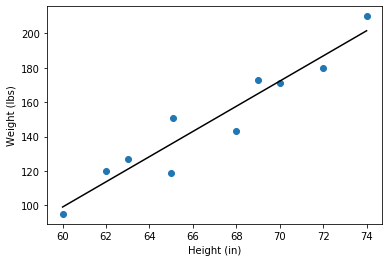

In [2]:
height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]

plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

<font size="5">The equation for the covariance between $X$ and $Y$ is:</font>


$$\LARGE COV(X, Y) = \sigma_{xy} = E[(X - \mu_{x})(Y - \mu_{y})]$$


<font size="5">Where the $ E[X]$ is the expected value of $X$, defined as</font>


$$\LARGE \begin{equation}
    E(x) = \begin{cases}
            \sum_{i = 1}^{n} p_{i}x_{i} & ,discrete. \\
            \int_{-\infty}^{\infty} f(x) dx & ,continuous.
            \end{cases}
           \end{equation}$$
           
<font size="5">Compare the **covariance** equation to the equation for the **variance**:</font>

$$\huge \begin{align}
VAR(X) &= \sigma_{x}^{2} &&= E[(X - \mu)^{2}] \\
COV(X,Y) &= \sigma_{xy} &&= E[(X - \mu_{x})(Y - \mu_{y})]
\end{align}$$



A covariance of 0 indicates no correlation. If the variance for **x** is 10, the variance for **y** is 4, and there is no linear correlation between **x** and **y**, then we would write (covariance matrix is symmetric):

$$\LARGE \Sigma = \begin{bmatrix}
            10 & 0 \\
            0  & 4 
            \end{bmatrix} = \begin{bmatrix}
                                \sigma_{x}^{2} & \sigma_{xy} \\
                                \sigma_{yx}  & \sigma_{y}^{2} 
                                \end{bmatrix}$$

Where:

$$\LARGE \sigma_{xy} = \sigma_{yx}$$





In [3]:
W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[2.50000e-02, 2.72750e+00],
       [2.72750e+00, 3.27235e+02]])

In [4]:
np.cov(H, W, bias = 1)

array([[2.00000e-02, 2.18200e+00],
       [2.18200e+00, 2.61788e+02]])

In [5]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)

np.cov(X, Y)

array([[6.95592287, 6.95592287],
       [6.95592287, 6.95592287]])

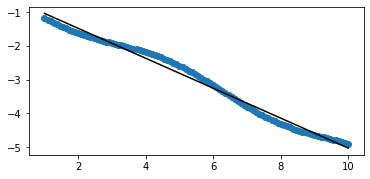

[[ 6.95592287 -3.08427   ]
 [-3.08427     1.38681544]]


In [6]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X) * 0.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

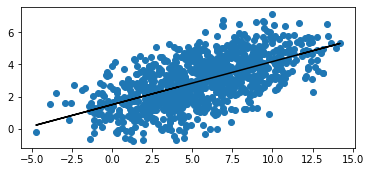

[[11.24886896  3.02181228]
 [ 3.02181228  2.21518379]]


In [7]:
X = np.linspace(1, 10, 1000) + np.random.randn(1000) * 2
Y = np.linspace(1, 5, 1000) + np.random.randn(1000) 
plot_correlated_data(X, Y)
print(np.cov(X, Y))

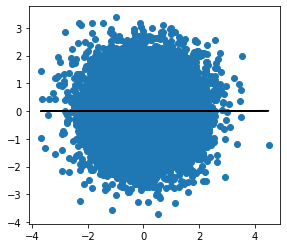

[[0.97915541 0.00186687]
 [0.00186687 0.98710881]]


In [8]:
X = np.random.randn(10000)
Y = np.random.randn(10000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

Recall the equation for the normal distribution:

$$\LARGE f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}e^{{-\frac{1}{2}\frac{(x - \mu)^{2}}{\sigma^2}}}}$$

The multivariate normal distribution in n dimensions:

$$\LARGE f(\textbf{x}, \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{n}\lvert \Sigma \rvert}} e^{-\frac{1}{2}(\textbf{x} - \mu)^{T}\Sigma^{-1}(\textbf{x} - \mu)}$$

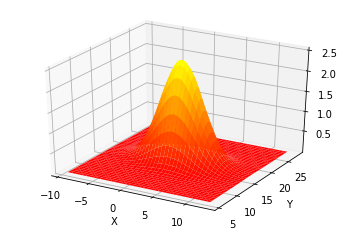

In [9]:
mean = [2.0, 17.0]
cov = [[10.0, 0.0],
       [0.0, 4.0]]
mkf_internal.plot_3d_covariance(mean, cov)

In [10]:
%precision 4
x = [2.5, 7.3]
mu = [2.0, 7.0]
P = [[8.0, 0.0],
     [0.0, 3.0]]
multivariate_gaussian(x, mu, P)

0.0315

In [11]:
try:
    print('{:.4f}'.format(scipy.stats.multivariate_normal(mu, P).pdf(x)))
except:
    print('You have an old version of scipy, upgrade it now!')

0.0315


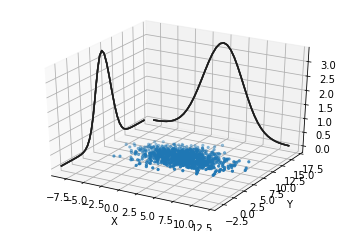

In [12]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

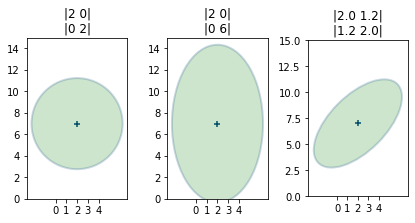

In [13]:
mkf_internal.plot_3_covariances()

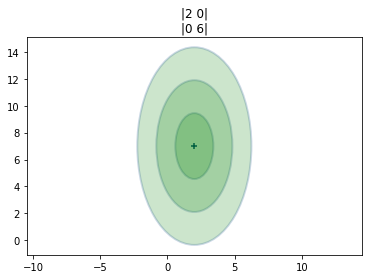

In [14]:
P = [[2, 0],
     [0, 6]]
plot_covariance_ellipse((2,7), P, fc = 'g', alpha = 0.2, std = [1, 2, 3], title = '|2 0|\n|0 6|')

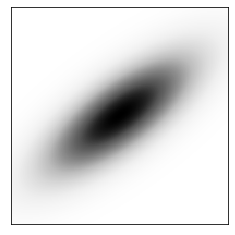

In [15]:
plot_cov_ellipse_colormap(cov = [[2, 1.2], [1.2, 1.3]])

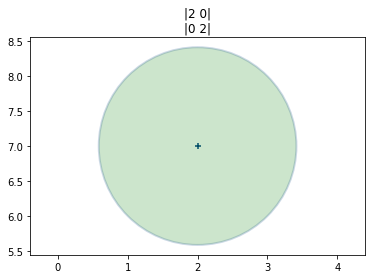

In [16]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc = 'g', alpha = 0.2, title = '|2 0|\n|0 2|')
plt.gca().grid(b = False)

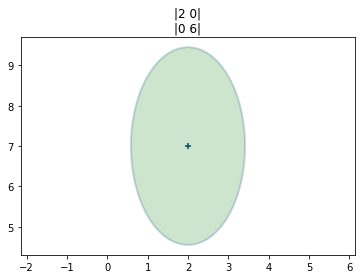

In [17]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc = 'g', alpha = 0.2, title = '|2 0|\n|0 6|')
plt.gca().grid(b = False)

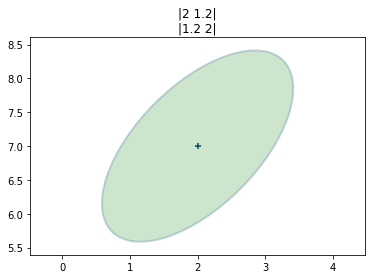

In [18]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc = 'g', alpha = 0.2, title = '|2 1.2|\n|1.2 2|')
plt.gca().grid(b = False)

In [19]:
cov_hw = np.cov(np.vstack((height, weight)), bias = 1)
print(cov_hw)

[[  18.5249  135.701 ]
 [ 135.701  1092.29  ]]


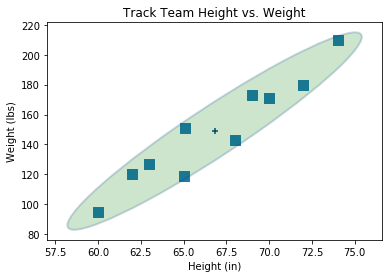

In [20]:
plt.scatter(height, weight, s = 120, marker = 's')
plt.title('Track Team Height vs. Weight')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc = 'g', alpha = 0.2, axis_equal = False, std = 2)

Text(0, 0.5, 'Years')

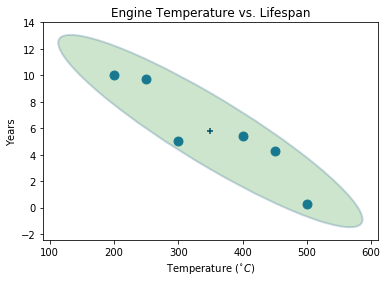

In [21]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s = 80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc = 'g', alpha = 0.2, axis_equal = False, std = 2)

plt.title('Engine Temperature vs. Lifespan')
plt.xlabel('Temperature ($^{\circ}C$)')
plt.ylabel('Years')

In [22]:
fig = None

def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig:
        plt.close(fig)
    fig = plt.figure(figsize = (6, 6))
    
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]
    plot_covariance_ellipse((10, 10), P1, axis_equal = False, show_semiaxis = True)
    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)
with figsize(y = 6):
    interact(plot_covariance,
            var_x = FloatSlider(value = 5, min = 0, max = 20),
            var_y = FloatSlider(value = 5, min = 0, max = 20),
            cov_xy = FloatSlider(value = 1.5, min = 0, max = 20, step = 0.2))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='var_x', max=20.0), FloatSli…

### Pearson's Correlation Coefficient 

<font size="5">This value can range in value from -1 to 1.

A value greater than 0 indicates that the relationship is a positive and a negative value indicates that there is a negative correlation. 

Value near -1 or 1 indicate a very strong correlation, and values near 0 indicate a very weak correlation.</font>

$$\LARGE \rho = \frac{COV(X,Y)}{\sigma_{x}\sigma_{y}}$$

<font size="5">Independent variables are always also uncorrelated. The reverse does not hold true</font>


In [23]:
pearsonr(height, weight)[0]

0.9539731096080194

In [25]:
pearsonr(max_temp, lifespan)[0]

-0.9178223453527254

Text(0, 0.5, 'Y')

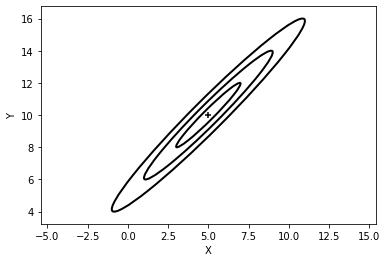

In [26]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec = 'k', std = [1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y')

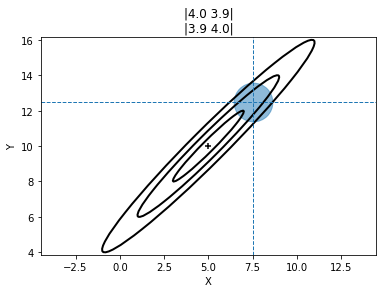

In [27]:
mkf_internal.plot_correlation_covariance()

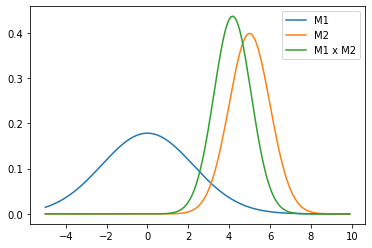

In [29]:
mkf_internal.plot_gaussian_multiply()

### Multivariate 

$$\LARGE \mu = \Sigma_{2}(\Sigma_{1} + \Sigma_{2})^{-1}\mu_{1} + \Sigma_{1}(\Sigma_{1} + \Sigma_{2})^{-1}\mu_{2}$$

$$\LARGE \Sigma = \Sigma_{1}(\Sigma_{1}+\Sigma_{2})^{-1}\Sigma_{2}$$

$$\LARGE \mu \approx \frac{\Sigma_{2}\mu_{1} + \Sigma_{1}\mu_{2}}{\Sigma_{1} + \Sigma_{2}}$$

$$\LARGE \Sigma \approx \frac{\Sigma_{1}\Sigma_{2}}{\Sigma_{1} + \Sigma_{2}}$$

### Univariate

$$\LARGE \mu = \frac{\sigma^2_{1}\mu_{2} + \sigma^{2}_{2}\mu_{1}}{\sigma^2_{1} +\sigma^{2}_{2}}$$

$$\LARGE \sigma^{2} = \frac{\sigma^2_{1}\sigma^2_{2}}{\sigma^{2}_{1} + \sigma^{2}_{2}}$$

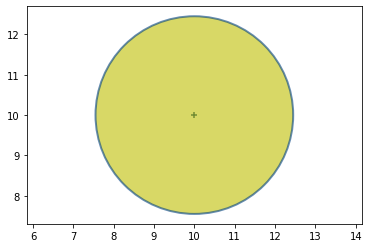

In [30]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc = 'y', alpha = 0.6)

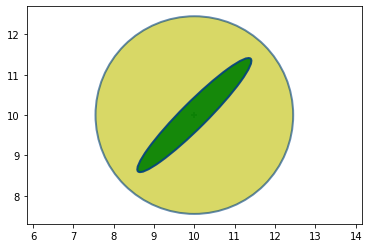

In [31]:
P1 = [[2, 1.9], [1.9, 2]]
plot_covariance_ellipse((10, 10), P0, fc = 'y', alpha = 0.6)
plot_covariance_ellipse((10, 10), P1, fc = 'g', alpha = 0.9)


<font size="5"></font>
$$\huge \begin{align}
f_{x} &= v\Delta t = 15 \times 2 \\
\bar{x}_{k} &= 10 + (15 \times 2) = 40
\end{align}$$
\